In [1]:
import os
import numpy as np
import pandas as pd
import fitz  # PyMuPDF
from PIL import Image

# Path to directory containing the PDF files
pdf_dir = "C:/temp/pdfs/"

# Get a list of all PDF files in the directory
pdf_files = [f for f in os.listdir(pdf_dir) if f.endswith(".pdf")]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["File1", "File2", "Difference"])

# Loop through all PDF files
for i in range(len(pdf_files)):
    # test if file name begins with 2012
    if pdf_files[i].startswith("2012"):
        # determine the ending of the file name after -14R
        desc1 = pdf_files[i].split("-14R")[-1]
        
        # Get the first file
        file1 = pdf_files[i]
        # Get the first file's path
        file1_path = os.path.join(pdf_dir, file1)
        # Open the first file
        doc1 = fitz.open(file1_path)
        # Get the first file's first page
        page1 = doc1.load_page(0)
        # Get the first file's first page's image
        pix1 = page1.get_pixmap()
        # Convert the first file's first page's image to a NumPy array
        img1 = np.array(Image.frombytes("RGB", [pix1.width, pix1.height], pix1.samples))
        # Loop through all PDF files again
        for j in range(i + 1, len(pdf_files)):
            if pdf_files[j].startswith("2013"):
                # determine the ending of the file name after -14R
                desc2 = pdf_files[j].split("ABS")[-1]
                # test if the file names are the same
                if desc1 == desc2:
                    # Get the second file
                    file2 = pdf_files[j]
                    # Get the second file's path
                    file2_path = os.path.join(pdf_dir, file2)
                    # Open the second file
                    doc2 = fitz.open(file2_path)
                    # Get the second file's first page
                    page2 = doc2.load_page(0)
                    # Get the second file's first page's image
                    pix2 = page2.get_pixmap()
                    # Convert the second file's first page's image to a NumPy array
                    img2 = np.array(Image.frombytes("RGB", [pix2.width, pix2.height], pix2.samples))
                    # Calculate the difference between the two images
                    difference = np.sum(np.abs(img1 - img2)) / (img1.shape[0] * img1.shape[1] * img1.shape[2] * 255)
                    # Add the results to the DataFrame
                    results_df = results_df.append({"File1": file1, "File2": file2, "Difference": difference}, ignore_index=True)


C:\Users\Adam\AppData\Local\Temp\ipykernel_22552\3628961062.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"File1": file1, "File2": file2, "Difference": difference}, ignore_index=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_22552\3628961062.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"File1": file1, "File2": file2, "Difference": difference}, ignore_index=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_22552\3628961062.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"File1": file1, "File2": file2, "Difference": difference}, ignore_index=True)
C:\Users\Adam\AppData\Local\Temp\ipykernel_22552\3628961062.py:5

In [3]:
# sort the results by the difference
results_df.sort_values(by="Difference", ascending=False, inplace=True)
results_df.head(20)

,File1,File2,Difference
31,2012 NINJA® ZX™-14R Fuel Tank.pdf,2013 NINJA® ZX™-14R ABS Fuel Tank.pdf,0.117509
21,2012 NINJA® ZX™-14R Frame Fittings.pdf,2013 NINJA® ZX™-14R ABS Frame Fittings.pdf,0.115641
59,2012 NINJA® ZX™-14R Transmission.pdf,2013 NINJA® ZX™-14R ABS Transmission.pdf,0.093870
26,2012 NINJA® ZX™-14R Front Master Cylinder.pdf,2013 NINJA® ZX™-14R ABS Front Master Cylinder.pdf,0.092838
62,2012 NINJA® ZX™-14R Water Pipe.pdf,2013 NINJA® ZX™-14R ABS Water Pipe.pdf,0.092081
11,2012 NINJA® ZX™-14R Cowling Lowers.pdf,2013 NINJA® ZX™-14R ABS Cowling Lowers.pdf,0.088975
49,2012 NINJA® ZX™-14R Rear Master Cylinder.pdf,2013 NINJA® ZX™-14R ABS Rear Master Cylinder.pdf,0.086833
37,2012 NINJA® ZX™-14R Ignition Switch_Locks_Refl...,2013 NINJA® ZX™-14R ABS Ignition Switch_Locks_...,0.082290
51,2012 NINJA® ZX™-14R Side Covers_Chain Cover.pdf,2013 NINJA® ZX™-14R ABS Side Covers_Chain Cove...,0.082237
56,2012 NINJA® ZX™-14R Taillight(s).pdf,2013 NINJA® ZX™-14R ABS Taillight(s).pdf,0.074729


File 1: 2012 NINJA® ZX™-14R Fuel Tank.pdf
File 2: 2013 NINJA® ZX™-14R ABS Fuel Tank.pdf
Difference: 0.11750903239753682


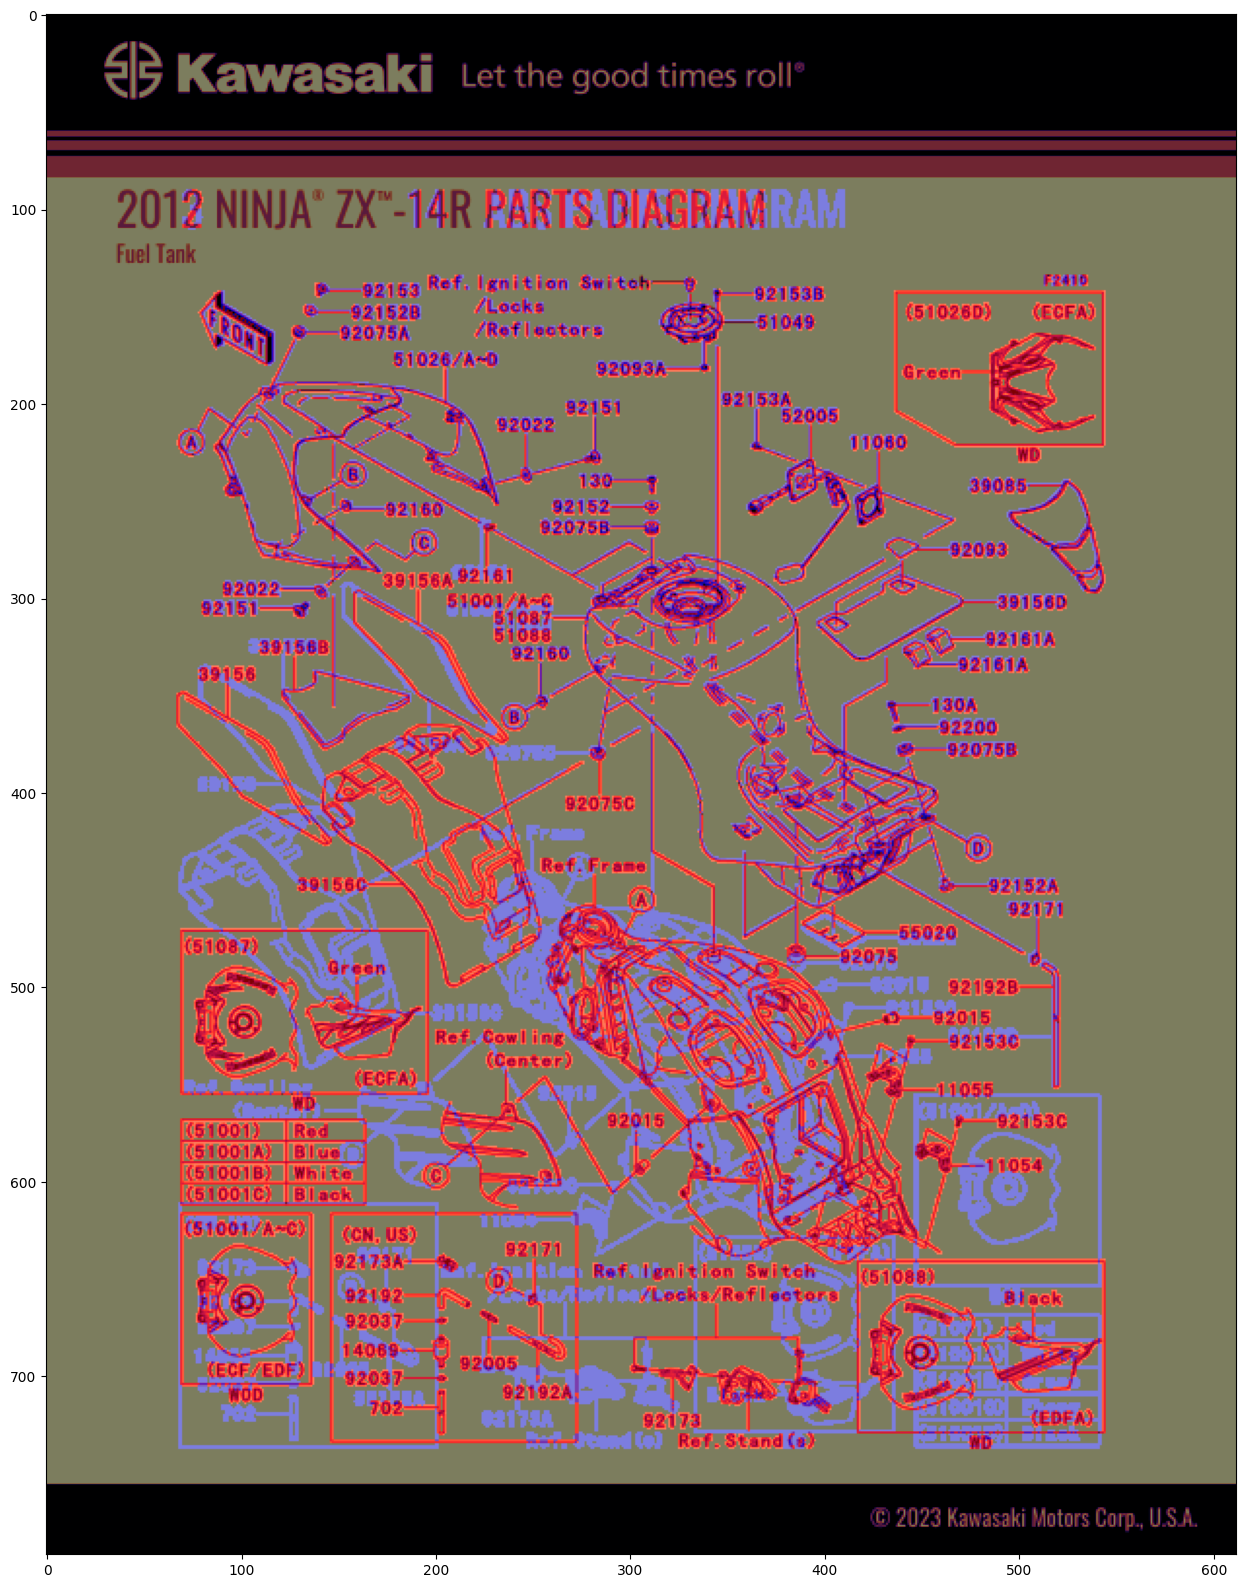

In [12]:
# display images for comparison based on difference ranking
from matplotlib import pyplot as plt
i = 0
diff = results_df.iloc[i, 2]
file1 = results_df.iloc[i, 0]
file2 = results_df.iloc[i, 1]
print(f"File 1: {file1}")
print(f"File 2: {file2}")
print(f"Difference: {diff}")
doc1 = fitz.open(os.path.join(pdf_dir, file1))
page1 = doc1.load_page(0)
pix1 = page1.get_pixmap()
img1 = np.array(Image.frombytes("RGB", [pix1.width, pix1.height], pix1.samples))
doc2 = fitz.open(os.path.join(pdf_dir, file2))
page2 = doc2.load_page(0)
pix2 = page2.get_pixmap()
img2 = np.array(Image.frombytes("RGB", [pix2.width, pix2.height], pix2.samples))

# convert images to grayscale
img1 = np.dot(img1[...,:3], [0.299, 0.587, 0.114])
img2 = np.dot(img2[...,:3], [0.299, 0.587, 0.114])

# record positions where img2 is darker than img1 and vice versa
diff2 = np.where(img2 < img1, 1, 0)
diff1 = np.where(img1 < img2, 1, 0)

# display image where red indicates img2 is darker than img1 and blue indicates img1 is darker than img2
img3 = np.zeros((img1.shape[0], img1.shape[1], 3))
img3[:,:,0] = diff1
img3[:,:,2] = diff2
# increase the size of the image
plt.rcParams["figure.figsize"] = (20,20)
# display img3
plt.imshow(img3)
plt.imshow(img1, cmap='magma', alpha=0.5)

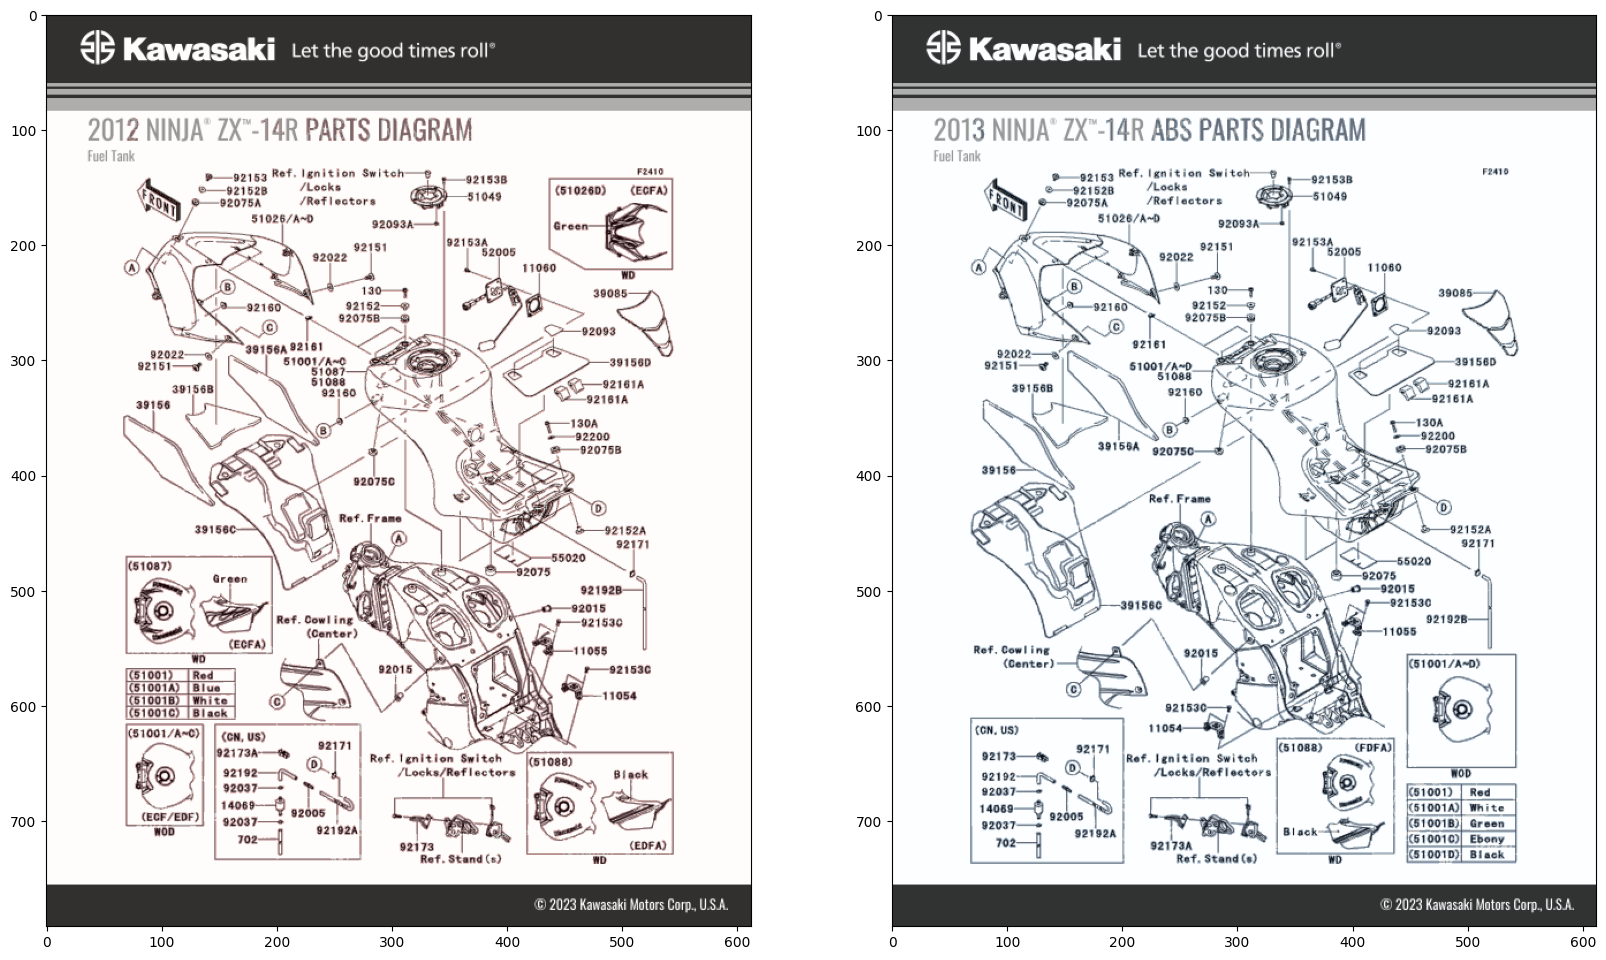

In [13]:
# display images 1 and 2 side by side
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

# overlay the image difference for each image
ax[0].imshow(diff1, cmap='Reds', alpha=0.2)
ax[1].imshow(diff2, cmap='Blues', alpha=0.2)